## Exploratory Data Analysis for Ads Effectiveness in Kenya

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Dataset overview

In [2]:
df = pd.read_csv("Advertising_Effectiveness.csv")
df.head(10)

,ID,County,Channel,Ad_Spend,Impressions,Clicks,Conversions,CTR,Conversion_Rate,Revenue,ROI
0,1,Kakamega,YouTube Ads,"Ksh1,319.58",16405,6655,423,40.57,6.36,"Ksh24,392.62",1748.51
1,2,Kisumu,Radio,"Ksh6,330.95",62278,8122,782,13.04,9.63,"Ksh81,854.85",1192.93
2,3,Nyeri,YouTube Ads,"Ksh47,358.64",30694,9380,149,30.56,1.59,"Ksh16,476.43",-65.21
3,4,Eldoret,Meta Ads,"Ksh25,451.29",38709,4936,734,12.75,14.87,"Ksh90,914.95",257.21
4,5,Kakamega,TV,"Ksh16,347.76",86440,4192,575,4.85,13.72,"Ksh60,201.72",268.26
5,6,Nairobi,Billboards,"Ksh18,777.38",31522,8516,20,27.02,0.23,"Ksh1,939.77",-89.67
6,7,Kakamega,Meta Ads,"Ksh37,648.98",44205,1633,977,3.69,59.83,"Ksh86,372.97",129.42
7,8,Machakos,Billboards,"Ksh4,319.68",82208,8498,461,10.34,5.42,"Ksh75,730.97",1653.16
8,9,Nakuru,Newspaper,"Ksh26,329.93",96454,9257,717,9.60,7.75,"Ksh95,066.45",261.06
9,10,Kakamega,TV,"Ksh30,497.90",35708,8959,490,25.09,5.47,"Ksh85,420.15",180.09


In [3]:
df.shape

(1000, 11)

In [4]:
df.dtypes

ID                   int64
County              object
Channel             object
Ad_Spend            object
Impressions          int64
Clicks               int64
Conversions          int64
CTR                float64
Conversion_Rate    float64
Revenue             object
ROI                float64
dtype: object

The dataset contains 1000 rows and 11 columns. Below is a summary of the dataset
* ID of Integer datatype: This is the Unique identifier for each row
* County of Object datatype: This is the names of counties where data was collected
* Channel of Object datatype: These are the advertising channels like YouTube Ads, Radio, etc. used
* Ad Spend of Object datatype: This is the amount spend on ads which is in Ksh
* Impressions of Integer datatype: This is the number of ad impressions
* Clicks of Integer datatype: This represents the number of clicks per ads
* Conversions of Integer datatype: This is the number of successful conversions from ads
* CTR (Click-Through Rate) of float datatype: It represents the percentage of clicks over impressions
* Conversion rate of float datatype: This is the percentage of conversions over clicks per ad
* Revenue of object datatype: This is the monetary values which is in "Ksh"
* ROI (Return on Investment)  of float datatype: This is the profitability of ads

## Dataset summary

In [8]:
df = df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8 non-null      float64
 1   Impressions      8 non-null      float64
 2   Clicks           8 non-null      float64
 3   Conversions      8 non-null      float64
 4   CTR              8 non-null      float64
 5   Conversion_Rate  8 non-null      float64
 6   ROI              8 non-null      float64
dtypes: float64(7)
memory usage: 512.0+ bytes


## Summary Statistics

In [26]:
df = pd.read_csv("Advertising_Effectiveness.csv")
df.describe()



,ID,Impressions,Clicks,Conversions,CTR,Conversion_Rate,ROI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,49453.880000,5119.245000,505.469000,26.429740,20.788360,359.26043
std,288.819436,28393.694711,2868.712744,289.356161,65.385271,36.913421,830.08779
min,1.000000,1104.000000,113.000000,11.000000,0.130000,0.150000,-97.57000
25%,250.750000,25705.750000,2600.500000,252.750000,5.292500,5.107500,10.21750
50%,500.500000,47628.500000,5183.500000,506.500000,10.320000,9.980000,129.63000
75%,750.250000,73626.000000,7603.500000,758.500000,21.070000,18.810000,386.44250
max,1000.000000,99993.000000,9990.000000,1000.000000,904.530000,384.440000,11264.42000


* Impressions range from 1,104 to 99,993 with a mean of 49,454.
* Clicks range from 113 to 9,990 with a mean of 5,119.
* Conversions range from 11 to 1,000 with a mean of 505.
* CTR and Conversion rate have high variability with CTR ranging from 0.13% to 904.53%.
* ROI is highly skewed, with values ranging from -97.57 to 11,264.42.

In [25]:
df.nunique()

ID                 1000
County                8
Channel               6
Ad_Spend           1000
Impressions         995
Clicks              948
Conversions         630
CTR                 869
Conversion_Rate     831
Revenue            1000
ROI                 993
dtype: int64

## Obersavation
* Ad spend and revenue are in a string format due to the currency used. However, this need to be converted to numeric for meaningful analysis.
* The data contains no missing values.

## Data cleaning
This will entail coverting Ad spend and revenue to integer to enhance meaningful analysis by removing "ksh"

In [ ]:
df = pd.read_csv("Advertising_Effectiveness.csv")
df['Ad_Spend'] = df['Ad_Spend'].str.replace("Ksh","").str.replace(",", "").astype(float)
df['Revenue'] = df['Revenue'].str.replace("Ksh", "").str.replace(",", "").astype(float)
df.head()


,ID,County,Channel,Ad_Spend,Impressions,Clicks,Conversions,CTR,Conversion_Rate,Revenue,ROI
0,1,Kakamega,YouTube Ads,1319.58,16405,6655,423,40.57,6.36,24392.62,1748.51
1,2,Kisumu,Radio,6330.95,62278,8122,782,13.04,9.63,81854.85,1192.93
2,3,Nyeri,YouTube Ads,47358.64,30694,9380,149,30.56,1.59,16476.43,-65.21
3,4,Eldoret,Meta Ads,25451.29,38709,4936,734,12.75,14.87,90914.95,257.21
4,5,Kakamega,TV,16347.76,86440,4192,575,4.85,13.72,60201.72,268.26


In [33]:
df.describe

<bound method NDFrame.describe of        ID    County      Channel  Ad_Spend  Impressions  Clicks  Conversions  \
0       1  Kakamega  YouTube Ads   1319.58        16405    6655          423   
1       2    Kisumu        Radio   6330.95        62278    8122          782   
2       3     Nyeri  YouTube Ads  47358.64        30694    9380          149   
3       4   Eldoret     Meta Ads  25451.29        38709    4936          734   
4       5  Kakamega           TV  16347.76        86440    4192          575   
..    ...       ...          ...       ...          ...     ...          ...   
995   996    Nakuru    Newspaper  15132.74        25741    5809          555   
996   997     Nyeri  YouTube Ads  46731.71        15722     329          114   
997   998    Kisumu    Newspaper  39636.61         6885    5551          477   
998   999     Nyeri  YouTube Ads  28878.06        91079    7563          438   
999  1000    Kisumu  YouTube Ads  22075.74        26862    2555          421   

     

### Summary statistics of cleaned dataset
* Ad spend ranges from 1,084.64 to 49,986.74 with a mean of 25,493.
* Revenue ranges from 941.96 to 192,613.96 with a mean of 63,566.75.
## Exploratory Data Analysis (EDA) 
## 1. Distribution

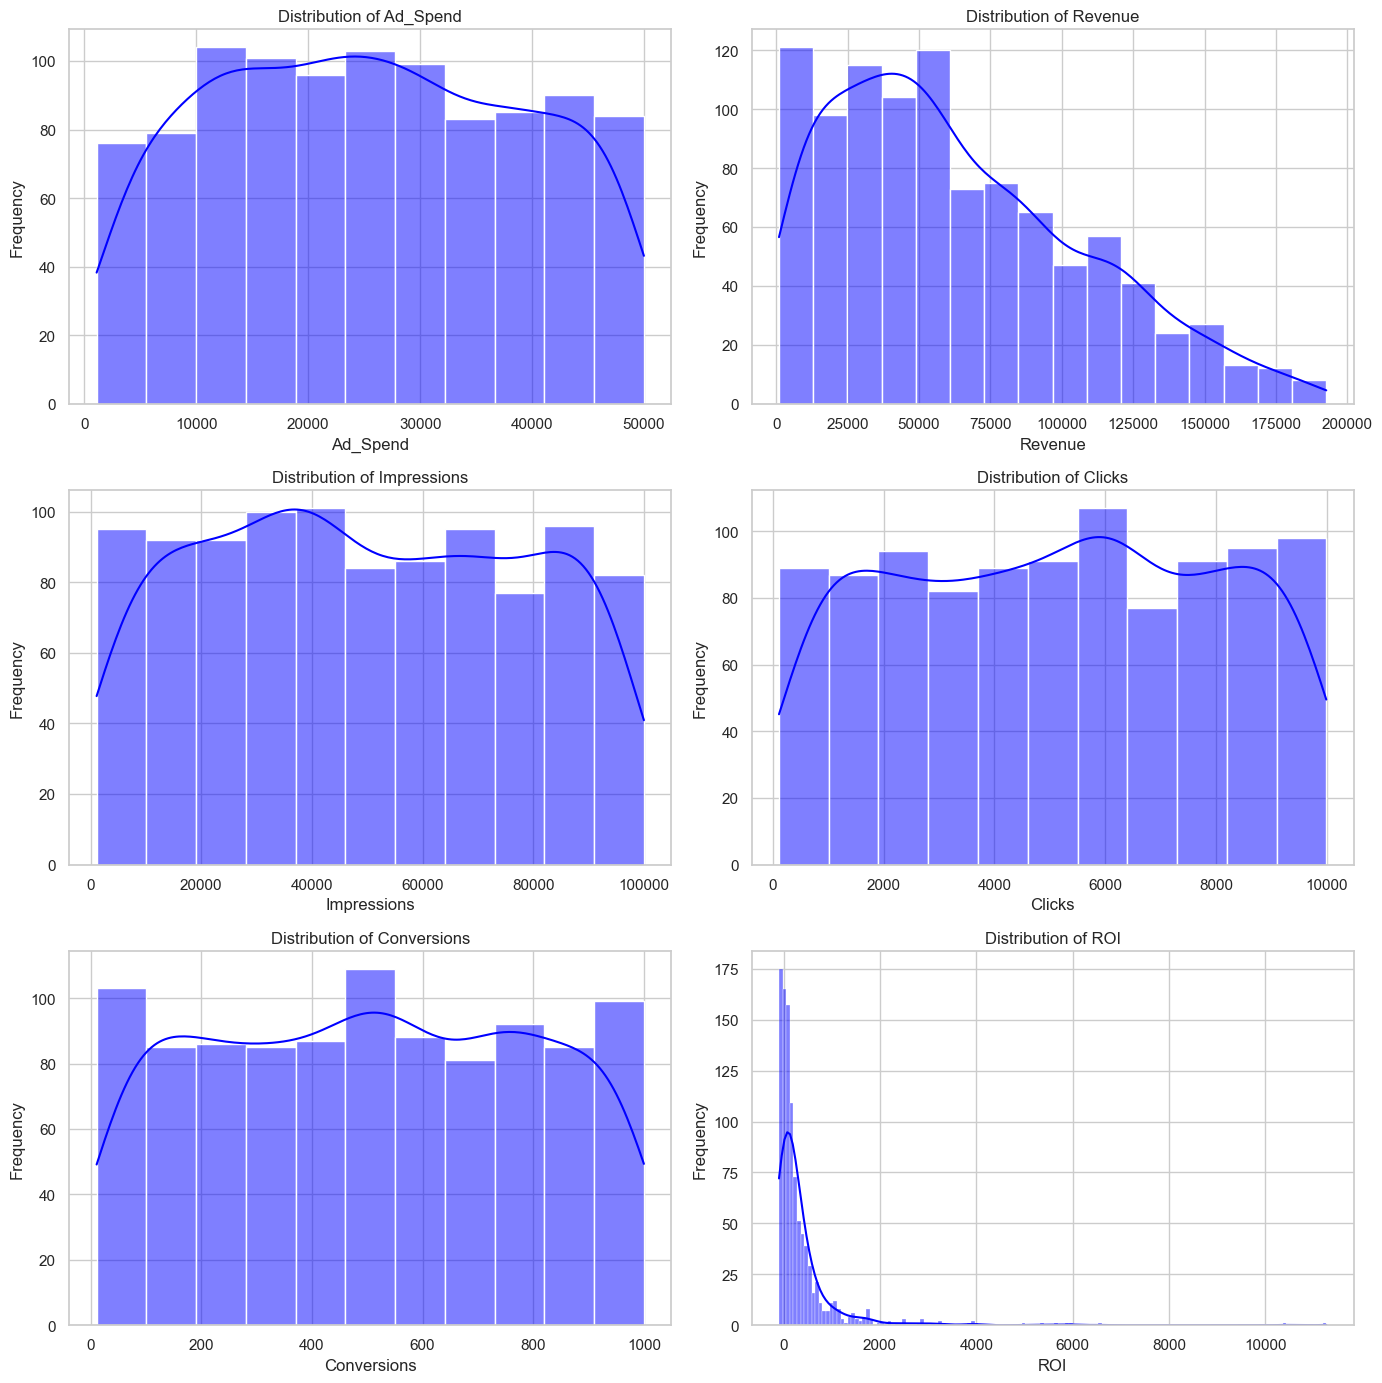

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
# The visual style for plots
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Distributions for key numeric variables: Ad_Spend, Revenue, Impressions, Clicks, Conversions, ROI
fig, axes = plt.subplots(3, 2, figsize=(14, 14))
numeric_columns = ['Ad_Spend', 'Revenue', 'Impressions', 'Clicks', 'Conversions', 'ROI']

for ax, col in zip(axes.flatten(), numeric_columns):
    sns.histplot(df[col], kde=True, ax=ax, color="blue")
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Findings of distribution analysis of key metrics variables in the dataset
1. Ad Spend
* Distribution is slightly right skewed with most spending clustered below the average of Ksh 25,493.
2. Revenue
* Revenue distribution is right skewed with a significant portion of data below the mean of Ksh 63,566.75.
* There are a few outliers which indicate high-performance of ad campaigns.
3. Impressions
* The impressions are uniformly distributed with a slight concentration in the mid-range of 50,000.
4. Clicks
* The clicks follow a similar pattern to impressions which suggests a direct relationship between the variables.
5. Conversions
* The conversion has a normal like distribution with a peak near the mean 505.
6. ROI (Return on Investment)
* ROI is highly skewed with most values concentrated near zero or slightly positive and a few extreme positive outliers.

## 2. Relationship between variables

C:\Users\hp\AppData\Local\Temp\ipykernel_16496\1219979468.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Channel', y='Revenue', data=df, ax=axes[1, 1], palette='muted')


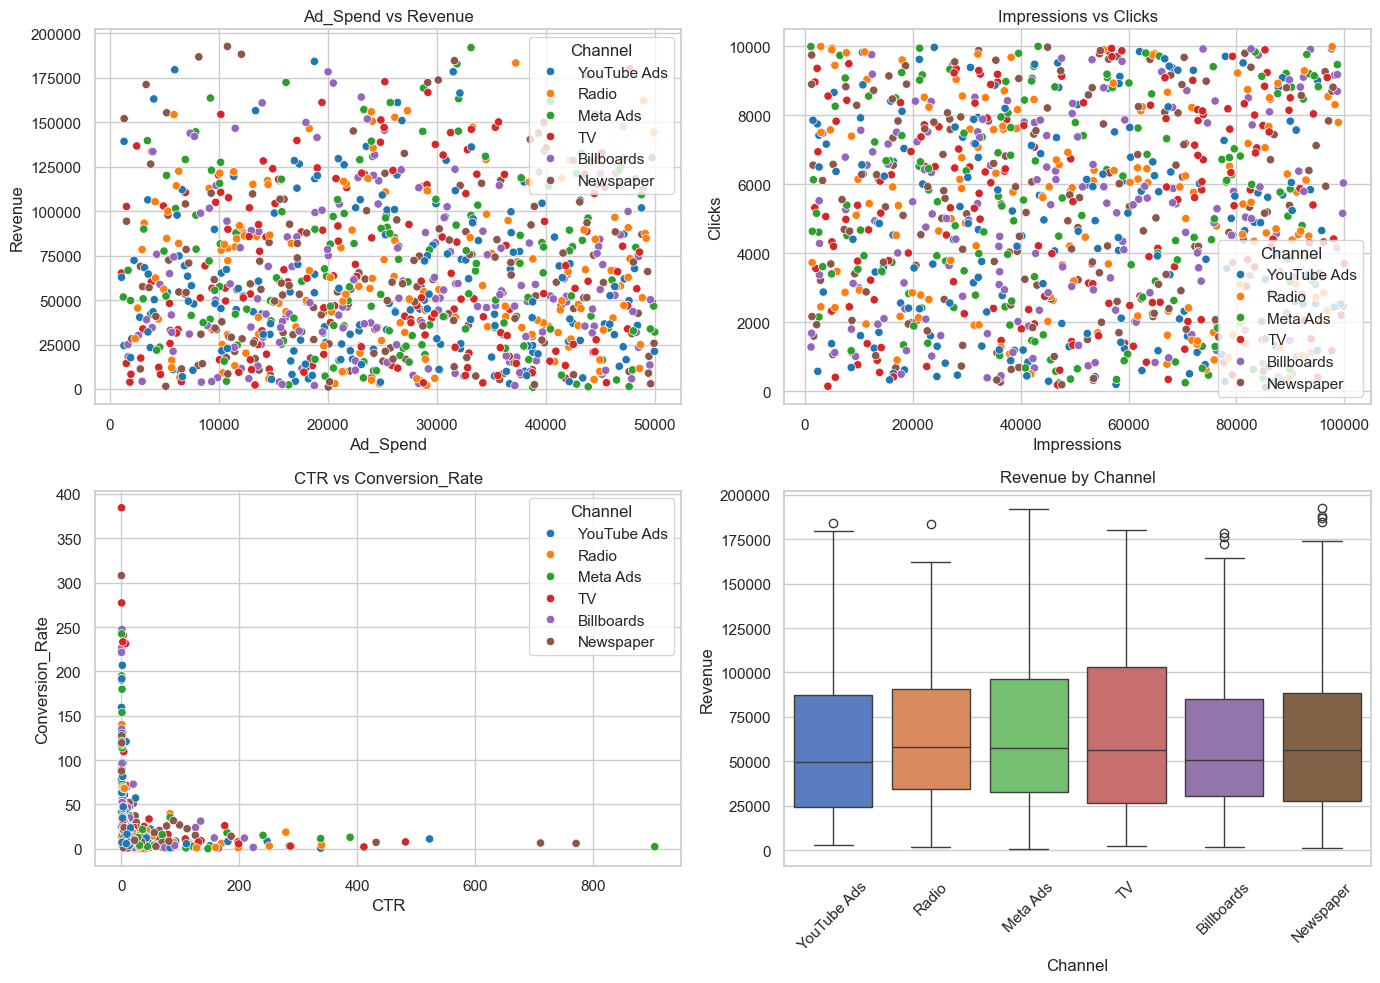

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Advertising_Effectiveness.csv")
df['Ad_Spend'] = df['Ad_Spend'].str.replace("Ksh","").str.replace(",", "").astype(float)
df['Revenue'] = df['Revenue'].str.replace("Ksh", "").str.replace(",", "").astype(float)
df.head()

# Setting up the visual style for plots
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Visualize relationships between key variables
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot: Ad_Spend vs Revenue
sns.scatterplot(x='Ad_Spend', y='Revenue', data=df, ax=axes[0, 0], hue='Channel', palette='tab10')
axes[0, 0].set_title('Ad_Spend vs Revenue')

# Scatter plot: Impressions vs Clicks
sns.scatterplot(x='Impressions', y='Clicks', data=df, ax=axes[0, 1], hue='Channel', palette='tab10')
axes[0, 1].set_title('Impressions vs Clicks')

# Scatter plot: CTR vs Conversion_Rate
sns.scatterplot(x='CTR', y='Conversion_Rate', data=df, ax=axes[1, 0], hue='Channel', palette='tab10')
axes[1, 0].set_title('CTR vs Conversion_Rate')

# Box plot: Revenue by Channel
sns.boxplot(x='Channel', y='Revenue', data=df, ax=axes[1, 1], palette='muted')
axes[1, 1].set_title('Revenue by Channel')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Findings
1. Ad spend vs Revenue
* There is a positive correlation between Ad spend and revenue where campaigns with higher ad spending generally yield higher revenue.
* Variability in results across different channels is visible with some outperforming others at similar spending levels.
2. Impressions vs Clicks
* There is a positive trend which suggests more impressions often lead to more clicks.
* The performance varies by channel with some generating more clicks per impression than others.
3. CTR vs Conversion Rate
* There is a positive relationship between Click-Through Rate (CTR) and Conversion Rate but with significant scatter, indicating variability in conversion efficiency.
4. Revenue by Channel
* Channels like YouTube Ads and Meta Ads show higher median revenue compared to others like Radio and TV.
* There is revenue dispersion which suggests significant variability in performance within each channel.


## 3. Perfomance Analysis of County and Channel variables 

C:\Users\hp\AppData\Local\Temp\ipykernel_16496\1982369759.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=county_spend.index, y=county_spend.values, ax=axes[0], palette="viridis")
C:\Users\hp\AppData\Local\Temp\ipykernel_16496\1982369759.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\hp\AppData\Local\Temp\ipykernel_16496\1982369759.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_spend.index, y=channel_spend.values, ax=axes[1], palette="plasma")
C:\Users\hp\AppData\Local\Temp\ipykernel_16496\1982369759.py:26:

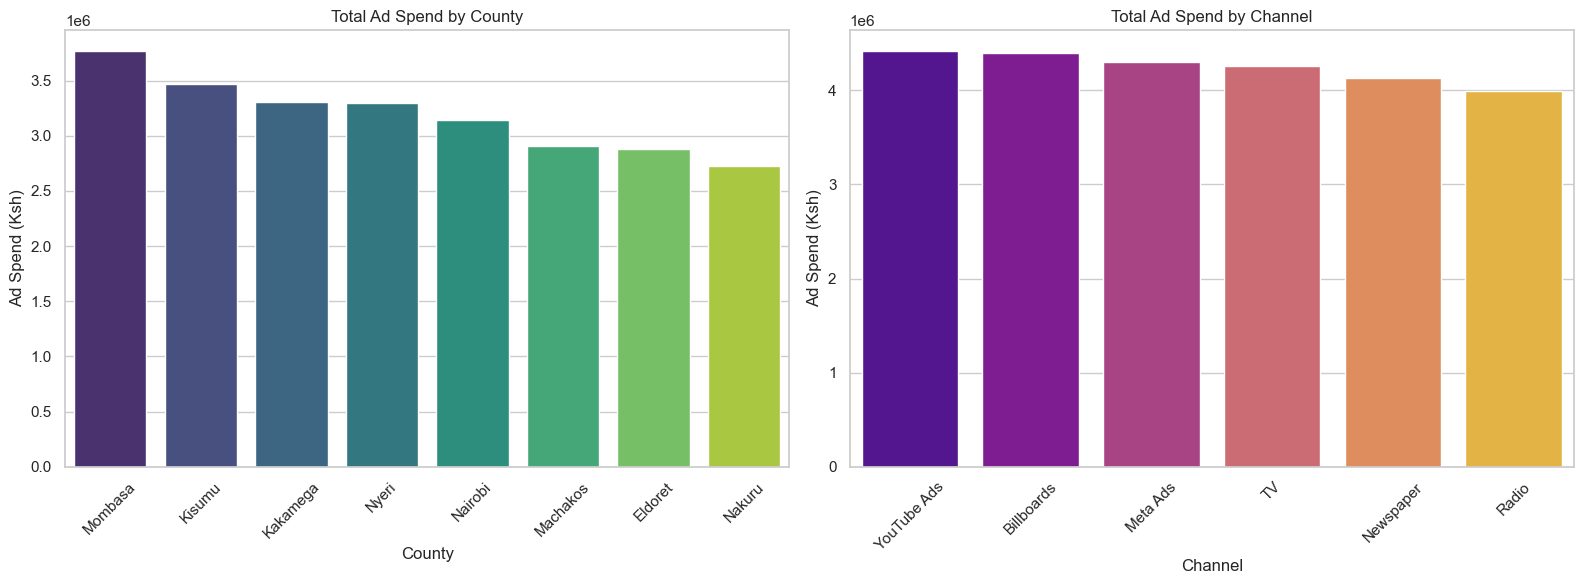

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Advertising_Effectiveness.csv")
df['Ad_Spend'] = df['Ad_Spend'].str.replace("Ksh","").str.replace(",", "").astype(float)
df['Revenue'] = df['Revenue'].str.replace("Ksh", "").str.replace(",", "").astype(float)
df.head()

# Group data by County and Channel for Ad Spend Analysis
county_spend = df.groupby('County')['Ad_Spend'].sum().sort_values(ascending=False)
channel_spend = df.groupby('Channel')['Ad_Spend'].sum().sort_values(ascending=False)

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# County-wise Ad Spend
sns.barplot(x=county_spend.index, y=county_spend.values, ax=axes[0], palette="viridis")
axes[0].set_title('Total Ad Spend by County')
axes[0].set_ylabel('Ad Spend (Ksh)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Channel-wise Ad Spend
sns.barplot(x=channel_spend.index, y=channel_spend.values, ax=axes[1], palette="plasma")
axes[1].set_title('Total Ad Spend by Channel')
axes[1].set_ylabel('Ad Spend (Ksh)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



### Findings
1. County Ad spend
* Some counties have significantly higher ad expenditures which indicates regional marketing focus.
* Top counties might require further investigation to understand their ROI performance.
2. Channel Ad spend
* Some channels like TV and YouTube Ads dominate ad spending. This highlights different preferrence in marketing platforms.
* The least-used channels may require performance evaluation to justify low spend.